# Numerical Differentiation

This lab is introducing a library called `numdifftools`

It contains useful functions for numerical differentiation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools

In [30]:
dir(numdifftools)[:5]

['Derivative', 'Gradient', 'Hessdiag', 'Hessian', 'Jacobian']

In [5]:
from numdifftools import Derivative, Gradient, Hessian, Jacobian, Hessdiag

## Derivative

In [10]:
def f(x):
    return x**2

df = Derivative(f)

array(6.)

## Gradient

Lets plot f function and it's tangent plane at (1,2) of the function $$f(x,y) = x^2 + y^2$$ This functions gradient is $$\nabla f(x,y) = (2x,2y)$$

The tangent plane for a general function is given by

$$ z-z_0 = \nabla f(x_0,y_0) \cdot (x-x_0,y-y_0)$$

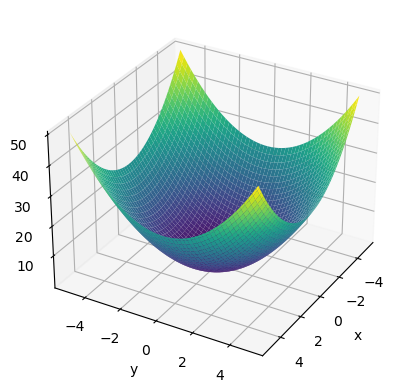

In [8]:
def f(x):
    return x[0]**2 + x[1]**2

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = f([X, Y])

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=30, elev=30)

plt.show()

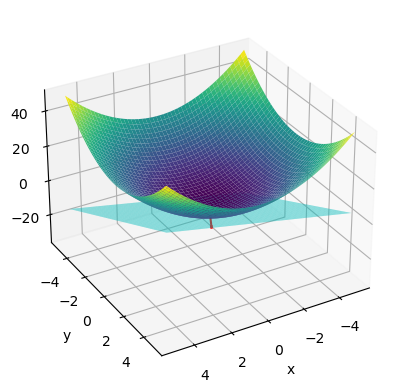

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=60, elev=30)

x0 = np.array([1.0, 2.0])
z0 = f(x0)
df = Gradient(f)(x0)

ax.quiver(x0[0], x0[1], z0, df[0], df[1], -1, color='r', length=1, normalize=True)

Z_plane = df[0] * (X - x0[0]) + df[1] * (Y - x0[1]) + z0

ax.plot_surface(X, Y, Z_plane, color='c', alpha=0.5)

plt.show()


We can use plotly to make interactive plots.

In [53]:
import plotly.graph_objects as go

# Define the surface
surface = go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.7)

# Define the point and the normal vector
x0, y0 = 1.0, 2.0
z0 = f([x0, y0])
g = Gradient(f)([x0, y0])
g = (g / np.linalg.norm(g))*3.14

# Define the line representing the normal vector
line = go.Scatter3d(x=[x0, x0+g[0]], y=[y0, y0+g[1]], z=[z0, z0-3.14],
                     mode='lines', line=dict(color='red', width=10))

# Define the tangent plane
plane = go.Surface(z=Z_plane, x=X, y=Y, opacity=0.5, showscale=False, colorscale=[[0, 'cyan'], [1, 'cyan']])

# Layout options
layout = go.Layout(scene=dict(aspectmode='cube',
                              zaxis=dict(range=[-5, 15]),
                              camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))),
                    margin=dict(l=0, r=0, b=0, t=0))

# Create the figure with the surface, the line, and the plane
fig = go.Figure(data=[surface, line, plane], layout=layout)

# Show the plot
fig.show()


## Hessian

$$
\begin{align}
H(f) &= \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix} \\
&= \begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}
\end{align}
$$

The hessian is a symmetric matrix that can be diagonalized and tells us about the curvature of the function

In [54]:
# Hessian example
def f(x):
    return x[0]**2 + x[1]**2

H = Hessian(f)([1.0, 2.0])

H

array([[2., 0.],
       [0., 2.]])

## Jacobian

$$
\begin{align}
J(f) &= \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{bmatrix} \\
&= \begin{bmatrix}
2x & 2y \\
2x & 2y
\end{bmatrix}
\end{align}
$$

For vector-valued function defined on $\mathbb{R}$ $$f: \mathbb{R} \rightarrow \mathbb{R}^m$$

the Jacobian is the Gradient with some extra brackets (gradient is a vector and jacobian is a matrix).

In [62]:
def f(x):
    return x[0]**2 + x[1]**2

J = Jacobian(f)

print(J([1.0, 2.0]))

G = Gradient(f)

print(G([1.0, 2.0]))


[[2. 4.]]
[2. 4.]


# Group assignment

**a)** Find the critical point near $x=1$ of 
$$y=\text{hyperbolic cosine of eks squared minus 2}$$

**b)** Show that it is a minimum using the second derivative test.

In [63]:
import numpy as np
from scipy.optimize import fsolve
import numdifftools as nd

In [66]:
# trying to be clever
fsolve(lambda x: nd.Derivative(lambda x: np.cosh(x**2 - 2))(x), 1.4)

array([1.41421356])

Balance between assigning the lambda function to a variable and using it directly.

If you are going to use the function only once, then it is better to use it directly. 

If you are going to use it more than once, then it is better to assign it to a variable.

It is a matter of style. And is only for readability. Readability is important and it is a large component of Python as a whole.

In this case, I think it is better to assign it to a variable.

In [ ]:
# proper way

y = lambda x: np.cosh(x**2 - 2)
dy = nd.Derivative(y)

print(f"Critical point is {fsolve(dy, 1.4)[0]:.4f}. dy({fsolve(dy, 1.4)[0]:.4f}) = {dy(fsolve(dy, 1.4)[0]):.4f}")
print(f"Function value at critical point and just away is {y(fsolve(dy, 1.4)[0]):.4f} and {y(fsolve(dy, 1.4)[0]+0.1):.4f}")
print("This indicates a local minimum.")

d2y = nd.Derivative(dy)

print(f"Second derivative is {d2y(fsolve(dy, 1.4)[0]):.4f}.")
print("This indicates the function is concave up at the critical point. Which means it is a local minimum.")

Critical point is 1.4142. dy(1.4142) = 0.0000
Function value at critical point and just away is 1.0000 and 1.0432
This indicates a local minimum.
Second derivative is 8.0000.
This indicates the function is concave up at the critical point. Which means it is a local minimum.
